# Анализ влияния различных факторов на успешность краудфандингового проекта на платформе Kickstarter
#### Выполнили: Бабурина Анастасия, Елкина Ольга, Романко Елизавета

### Введение
Привлечение инвестиций - важнейший этап запуска любого проекта. В последние годы растет значимость альтернативных источников финансирования бизнес-проектов, в частности, краудфандинга. Если говорить обобщенно, краудфандинг - это практика финансирования путем сбора средств у большого количества людей, как правило, через Интернет. 
<br/><br/>
Оценка концепции краудфандинга, ее перспективы и важность для развития независимых бизнес-проектов рассмотрены в статье *Valanciene, Jegeleviciute (2013)*. Авторы выделяют следующие причины, по которым краудфандинг заслуживает внимания в качестве инструмента привлечения финансирования: 
* Краудфандинг служит идентификатором жизнеспособности бизнес-идеи и её рыночной ценности 
* Выступает маркетинговым инструментом и способом коммуникации автора идеи с аудиторией
* Позволяет автору бизнес-проекта сохранять контроль за над принятием решений после привлечения внешнего финансирования
* Дает возможность развивать наиболее интересные и ценные проекты и идеи для общества в целом

Однако в силу своей новизны, краудфандинг слабо развит в России, а также практически не изучен в отечественной науке, что и обосновывает актуальность нашего исследования. Цель нашей работы - изучить best practices зарубежного краудфандинга, чтобы иметь возможность развивать эту сферу в России.


### Исследовательский вопрос и гипотезы
Для формулировки исследовательского вопроса и выдвижения гипотез, обратимся к академической литературе по нашей теме. Факторы, влияющие на успешность краудфандинговых проектов - довольно популярный объект исследований в зарубежной литературе. Например, в статье *Deng, Ye, Xu, Sun (2022)* на основании почти 100 эмпирических исследований с использованием 8 различных методов измерения успешности краудфандингового проекта выявлены выявлено влияние факторов, исследуемых в нашей работе: продолжительность проекта, дата, в которую проект был начат, категория, к которой относится проект, географическая принадлежность, цель по сбору средств, страна, в которой запускается проект, качество продвижения и раскрутки проекта в социальных сетях. 
<br/><br/>
В работе *Cordova, Dolci, Gianfrante (2015)* используются данные о 1127 технологических проектах с четырех разных краудфандинговых платформ. В результате исследования определены следующие факторы, влияющие на успех кампании: продолжительность проекта, цель по сбору средств, а также частота внесения взносов. 
<br/><br/>
В работе *Спиридонова, Сошников (2016)* рассматривается влияние следующих факторов на успешность краудфандингового проекта: цель по сбору средств, качество раскрутки проекта и активность автора в социальных сетях, продолжительность проекта (период сбора), а также вознаграждение для доноров. 
<br/><br/>
На основе имеющихся данных и обзора академической литературы мы считаем целесообразным проверить 3 гипотезы: 
* На успешность краудфандингового проекта оказывает значимое влияние заявленная цель по объему собираемых средств,
* Успешность проекта зависит от его продолжительности (причем зависимость скорее всего нелинейная), 
* Успешность проекта зависит от категории: в некоторых категориях вероятность достигнуть цель значимо выше, чем в других.

### Данные
[Датасет](https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects) был взят с платформы Kaggle. В датасете собрана информация о большом количестве проектов Kickstarter и о том, достигли ли они в конечном итоге своих целей финансирования. Этот набор данных включает в себя широкий спектр типов проектов, в том числе технологические стартапы, творческие проекты и социальные инициативы.
> Kickstarter — это популярная краудфандинговая платформа, которая помогла тысячам предпринимателей воплотить в жизнь свои инновационные идеи. Однако не все проекты Kickstarter успешны, и понимание факторов, способствующих успеху или неудаче, может быть ценным как для бизнеса, так и для инвесторов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

palette = sns.color_palette('husl')
sns.set(style='darkgrid')

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kickstarter_projects.csv')
df = df.drop(['ID'], axis=1)

Целевая переменная  - статус проекта (**‘State’**, категориальная), показывает, достиг ли проект цели по сбору денег. Всего есть 5 значений этой переменной, а именно: *‘failed’*, *‘successful’*, *‘live’*, *‘suspended’* и *‘canceled’*. В данной работе анализируются факторы, влияющие на успешность проекта, поэтому будут рассматриваться только проекты, завершенные по срокам и прошедшие проверку политки платформы - это *'failed'* и *'successful'*. 
<br/>Неудачные проекты обозначаются ‘0’, успешные - ‘1’.


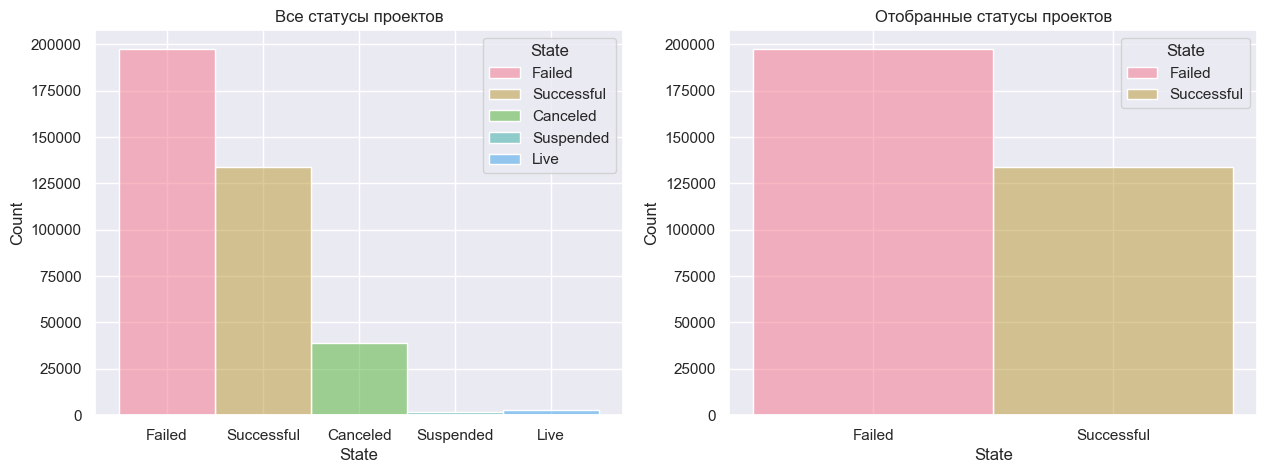

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df, x='State', hue='State', ax=ax[0], palette=palette)
ax[0].set_title('Все статусы проектов')
sns.histplot(df[(df['State']=='Failed')|(df['State']=='Successful')], x='State', hue='State', ax=ax[1], palette=palette)
ax[1].set_title('Отобранные статусы проектов')
plt.show();

In [4]:
# Оставляем только Failed и Successful
df = df[(df['State']=='Failed')|(df['State']=='Successful')]

Также в данных представлены различные факторы, влияние которых и будет рассмотрено. Это такие переменные как категория, в которой запускается проект (**‘Category’**); подкатегория (**‘Subcategory’**); страна происхождения проекта (**‘Country’**); дата начала сбора (**‘Launched’**); дата окончания сбора (**‘Deadline’**); количество денег,  необходимое для проекта (**‘Goal’**); собранное количество денег (**‘Pledged’**); количество спонсоров (**‘Backers’**). Далее по порядку  будет показано, какие преобразования нужно проделать с имеющимися данными для продолжения исследования.


In [5]:
df.head()

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


- **‘Category’** - категориальный признак. Данный признак имеет 15 уникальных значений, которые будут закодированы в бинарный признак с помощью One-Hot-Encoding.
- **‘Subcategory’** - категориальный признак. Данный признак имеет 159 уникальных значений. Эта переменная не будет рассматриваться, так как ее учет и перекодирование в бинарную переменную может резко увеличить число рассматриваемых признаков. Либо же, если группировать более мелкие подкатегории в одну отдельную группу, подкатегории различных категорий могут смешаться, что повлечет не репрезентативное представление признака.
- **‘Country’** - категориальная переменная. Всего этот признак имеет 22 уникальных значения.
- **‘Launched’** и **‘Deadline’** - это переменные типа “дата”. Эти признаки будут объединены в один - срок кампании в днях (**‘Duration’**) - путем вычитания из даты окончания даты начала.
- **‘Goal’**  и **‘Pledged’** - числовые непрерывные переменные. Из рассмотрения предлагается убрать переменную **‘Pledged’**, иначе в данных будет наблюдаться строгая мультиколлинеарность, так как проект считается успешным (**‘State’** = 1), если денег было собрано достаточно, чтобы цель была достигнута. Соответственно, когда денег собрано менее того количества, которое было заявлено, проект считается неудачным (**‘State’** = 0). Переменная **‘Goal’** - целевая сумма кампании - была также прологарифмирована, это помогло сгладить распределение и в дальнейшем сможет уменьшить влияние выбросов на оценки.
- **‘Backers’** - числовая дискретная переменная. Распределение данного признака имеет тяжелый хвост, поэтому было принято решение поделить регрессор на 4 интервала по квантилям.


In [6]:
# Добавим переменную Duration
from datetime import datetime
format = '%Y-%m-%d'
df['Deadline'] = df['Deadline'].apply(lambda x: datetime.strptime(x, format))
df['Launched'] = df['Launched'].apply(lambda x: datetime.strptime(x[:10], format))
df['Duration'] = pd.DatetimeIndex(df['Deadline']).date - pd.DatetimeIndex(df['Launched']).date
df['Duration'] = df['Duration'].apply(lambda x: x.days)

In [7]:
# Прологарифмируем переменную Goal с помощью преобразования ln(1 + x)
df['Log_Goal'] = df['Goal'].apply(lambda x: np.log1p(x))

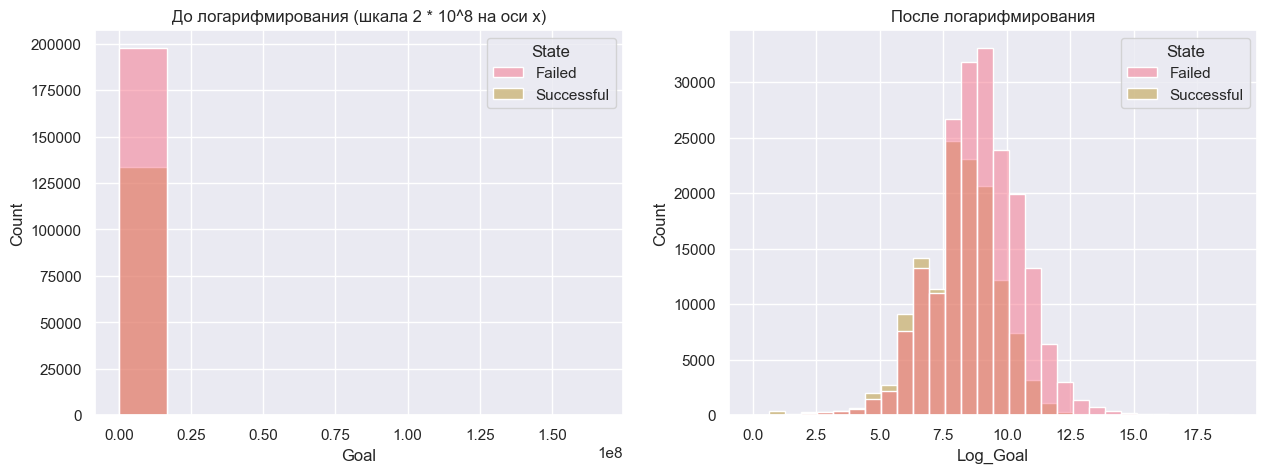

In [8]:
# Распределение переменной Goal до и после логарифмирования
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df, ax=ax[0], x='Goal', bins=10, hue='State', palette=palette)
ax[0].set_title('До логарифмирования (шкала 2 * 10^8 на оси x)')
sns.histplot(df, ax=ax[1], x='Log_Goal', bins=30, hue='State', palette=palette)
ax[1].set_title('После логарифмирования')
plt.show()

In [9]:
# Убираем ненужные переменные
df = df.drop(['Subcategory', 'Pledged', 'Launched', 'Deadline', 'Goal'], axis=1)

In [10]:
# Разделим датасет на квантили по количеству инвесторов - это наши группы
df['Backers_quantile'] = pd.qcut(df['Backers'], 4, labels=False)

# Посмотрим на верхние и нижние границы интервалов для групп
df.groupby('Backers_quantile').agg({'Backers': ['mean', 'min', 'max']})

Backers            
                        mean min     max
Backers_quantile                        
0                   0.792101   0       2
1                   7.327804   3      15
2                  34.686892  16      63
3                 425.917531  64  219382

### EDA по гипотезам
#### Успешность проекта зависит от категории: в некоторых категориях вероятность достигнуть цель значимо выше, чем в других
В некоторых категориях действительно наблюдается большая разница между количеством успешных и проваленных проектов

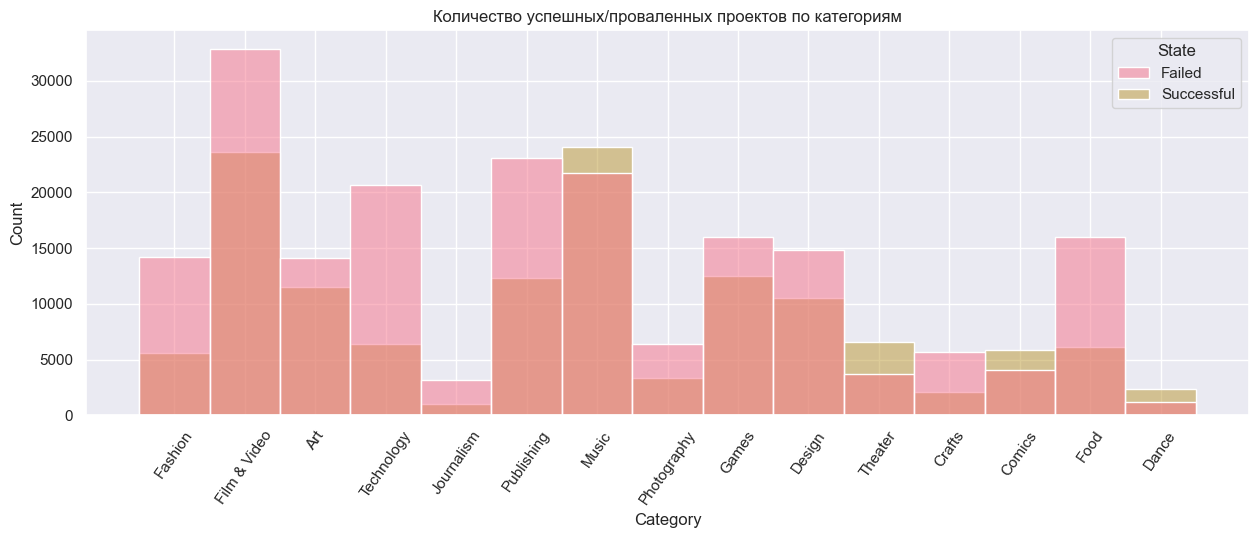

In [11]:
plt.subplots(figsize=(15,5))
plt.title('Количество успешных/проваленных проектов по категориям')
plt.xticks(rotation=55)
sns.histplot(data=df, x='Category', hue='State', palette=palette)
plt.show()

#### На успешность краудфандингового проекта оказывает значимое влияние заявленная цель по объему собираемых средств
Судя по графику, проваленные проекты в среднем запрашивают больше денег


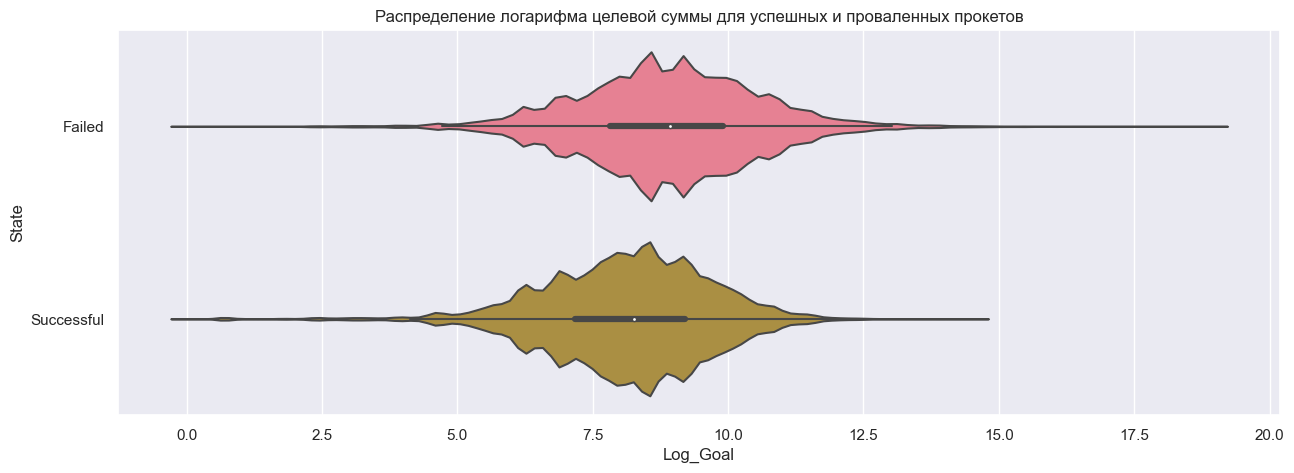

In [12]:
plt.subplots(figsize=(15,5))
plt.title('Распределение логарифма целевой суммы для успешных и проваленных прокетов')
sns.violinplot(df, x="Log_Goal", y="State", palette=palette)
plt.show()

#### Успешность проекта зависит от его продолжительности (причем зависимость скорее всего нелинейная), 
Как будто тут гипотеза может не подтвердиться, потому что большинство проектов имеют продолжительность ровно 1 или 2 месяца

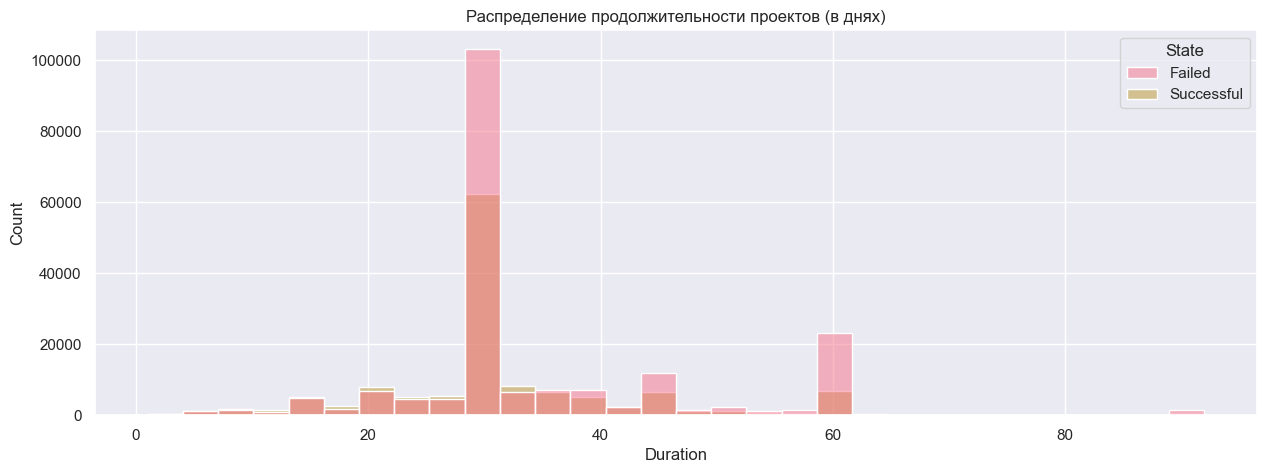

In [13]:
plt.subplots(figsize=(15,5))
plt.title('Распределение продолжительности проектов (в днях)')
sns.histplot(data=df, x='Duration', hue='State', bins=30, palette=palette)
plt.show()

#### Дополнительно: в некоторых странах доля успешных проектов значительно больше, чем в других
Просто интересно посмотреть, и график красивый)

In [14]:
df['Bin_State'] = df['State'].apply(lambda x: 1 if x=='Successful' else 0)
by_country = (df[['Country', 'Bin_State']].groupby(['Country']).sum() / df[['Country', 'Bin_State']].groupby(['Country']).count()).reset_index()

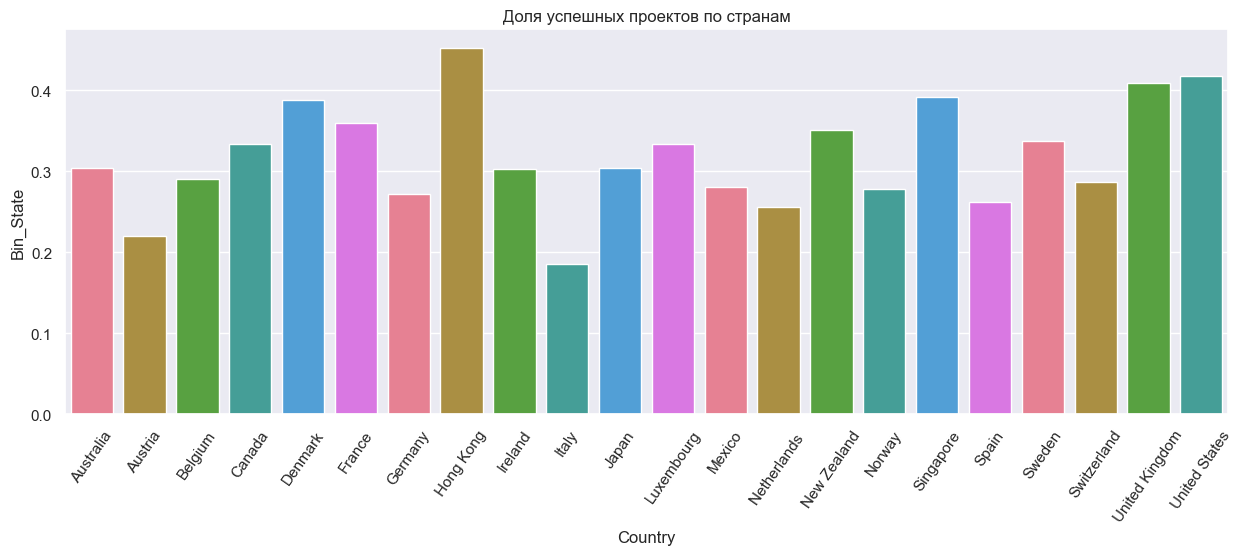

In [15]:
plt.subplots(figsize=(15,5))
plt.title('Доля успешных проектов по странам')
plt.xticks(rotation=55)
sns.barplot(data=by_country, x='Country', y='Bin_State', palette=palette)
plt.show()

In [16]:
df.to_csv('preprocessed_data.csv')

### Эндогенность

Еще на этапе обзора литературы стало очевидно, что в нашем датасете, скорее всего, есть пропущенные переменные. У нас нет данных о раскрутке и качестве продвижения краудфандинговых проектов в социальных сетях, и вознаграждении для доноров, в то время как с точки зрения литературы эти факторы имеют значимое влияние.
<br/><br/>
Продумывая вопрос о возможном наличии эндогенности в модели, мы снова обратились к академической литературе, чтобы понять, какие переменные могут быть пропущены в модели. Например, в статье *Cordova, Dolci, Gianfrante (2015)* авторы указывают на значимость для успешности краудфандингового проекта таких факторов, как его конкретная рыночная ниша, организационная форма, принятая предпринимателем (фирма или отдельный предприниматель), наличие или отсутствие предыдущего опыта у краудфандера, качество презентации проекта и многое другое. 
<br/><br/>
В работе *Colistra, Duvall (2017)* авторы исследуют, какие факторы оказывают наибольшее влияние на то, решит ли пользователь поддержать проект на платформе Kickstarter. Исследование проводилось посредством интервьюирования и онлайн-опроса инвесторов. Авторы исследуют влияние таких факторов, как отношение пользователей к политике краудфандинговой платформы, степень вовлеченности инвестора в проект, коммуникация между автором и инвестором, наличие эксклюзивных наград и личный творческий интерес. У нас не было возможности включить в модель данные переменные, так как мы не имеем таких данных.

### Спецификация модели
Для анализа будет использоваться логит-модель, со следующей функцией активации: $$F(z_i) = \frac{1}{1 + e^{-z_i}}$$ В исследовании *Чено и Цуруми (2010)* показано, что при сбалансированных бинарных данных и достаточно большом количестве наблюдений (более 1000), различие между логит и пробит моделью незначительны. Дополнительным преимуществом логит-модели является интерпретируемость результатов, в то время как в пробит-модели интерпретация не так очевидна.
<br/><br/>
Так как в нашем датасете много категориальных переменных (в том числе таргет), мы планируем использовать библиотеку CatBoost для эффективной работы с ними. 